In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, LeaveOneOut
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# 1st Dataset - Whine Dataset

In [3]:
# Load wine data
whine_data = pd.read_csv("data/whine-data/wine_dataset.csv")

# Separate features and target
X = whine_data.drop("class", axis=1)
y = whine_data["class"]

count = y.value_counts()
print(count)

class
0    4898
1    1599
Name: count, dtype: int64


## Select K using K-fold


Mean Accuracy for k=1: 0.9932286357710087
Mean Accuracy for k=2: 0.9939978665402395
Mean Accuracy for k=3: 0.9938440203863934
Mean Accuracy for k=4: 0.9941519497451701
Mean Accuracy for k=5: 0.9921512385919165
Mean Accuracy for k=6: 0.9927668602583856
Mean Accuracy for k=7: 0.9918435462842241
Mean Accuracy for k=8: 0.9919971553869859
Mean Accuracy for k=9: 0.9909199952589782
Mean Accuracy for k=10: 0.9916892260282092
Mean Accuracy for k=11: 0.9903041365414248
Mean Accuracy for k=12: 0.9912274505155863
Mean Accuracy for k=13: 0.9903038994903403
Mean Accuracy for k=14: 0.9907656750029632
Mean Accuracy for k=15: 0.9901502903875785
Mean Accuracy for k=16: 0.9909197582078939
Mean Accuracy for k=17: 0.9901500533364942
Mean Accuracy for k=18: 0.9910733673106555
Mean Accuracy for k=19: 0.9893808225672635
Mean Accuracy for k=20: 0.9903041365414248
Mean Accuracy for k=21: 0.9895346687211095
Mean Accuracy for k=22: 0.9906123029512861
Mean Accuracy for k=23: 0.990150527438663
Mean Accuracy for k=2

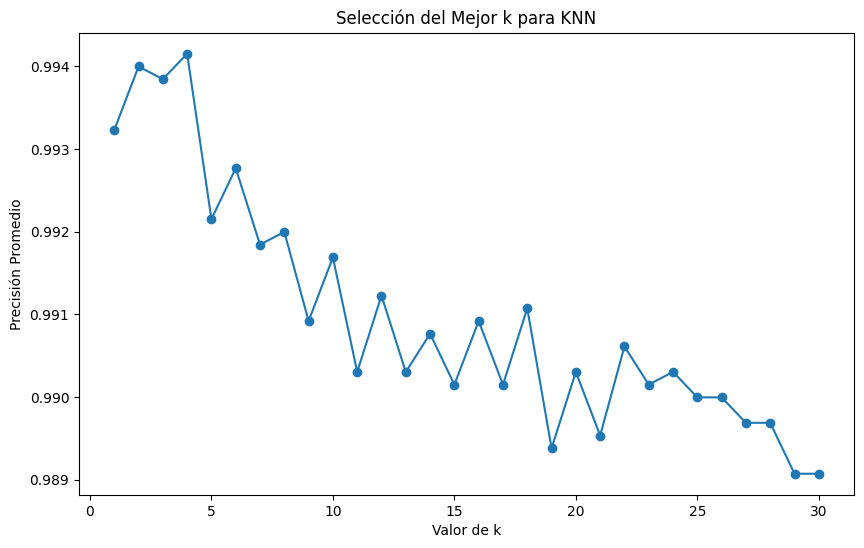

In [6]:
# Initialize the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=1)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

smote = SMOTE(random_state=42)
scaler = StandardScaler()

# Prueba diferentes valores de k
k_values = range(1, 31)  # Prueba de 1 a 30 vecinos
mean_accuracies = []

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    overall_confusion_matrix = np.zeros((2, 2))  # Ajusta el tamaño si tienes más de 2 clases

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplica SMOTE a los datos de entrenamiento
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Normaliza los datos de entrenamiento y de prueba
        X_train_resampled = scaler.fit_transform(X_train_resampled)
        X_test = scaler.transform(X_test)

        model_knn.fit(X_train_resampled, y_train_resampled)
        y_pred = model_knn.predict(X_test)

        # Calcula la precisión para cada fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Actualiza la matriz de confusión
        fold_confusion_matrix = confusion_matrix(y_test, y_pred)
        overall_confusion_matrix += fold_confusion_matrix

    # Calcula la precisión promedio para este valor de k
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)
    print(f"Mean Accuracy for k={k}: {mean_accuracy}")

# Encuentra el valor de k con la mejor precisión
best_k = k_values[np.argmax(mean_accuracies)]
print(f"\nEl mejor valor de k es: {best_k} con una precisión promedio de: {np.max(mean_accuracies)}")

# Gráfico de precisión promedio vs. valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-')
plt.xlabel('Valor de k')
plt.ylabel('Precisión Promedio')
plt.title('Selección del Mejor k para KNN')
plt.show()


## Hold-Out stratify

In [7]:
# Perform stratified Hold-Out split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Balance data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [8]:
# Instantiate the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=4)

# Train the classifier on the resampled training data
model_1NN.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model_1NN.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1470
           1       0.99      0.98      0.98       480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950


Accuracy of the model: 0.9923076923076923




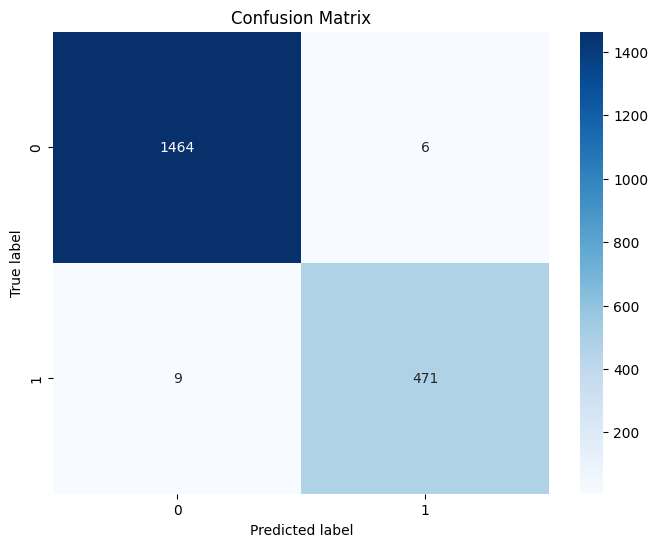

In [9]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

# Create a heatmap for the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [10]:
# Initialize the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=4)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [11]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    model_1NN.fit(X_train_resampled, y_train_resampled)
    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9941519497451701



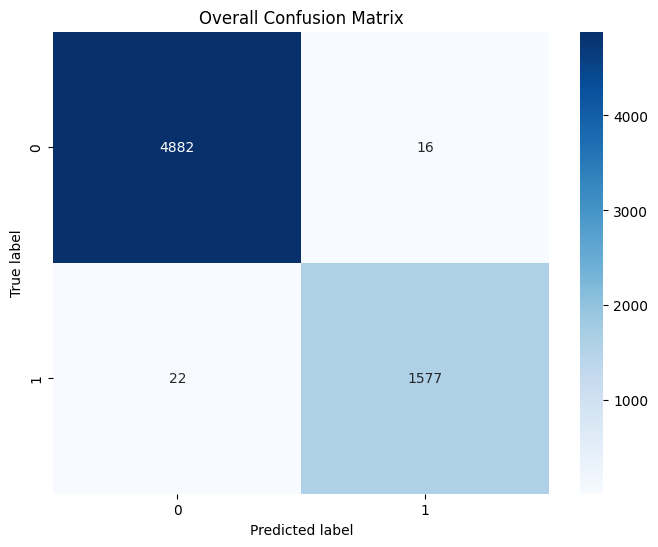

In [12]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [15]:
model_1NN = KNeighborsClassifier(n_neighbors=4)

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [16]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    model_1NN.fit(X_train_resampled, y_train_resampled)
    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9944589810681853



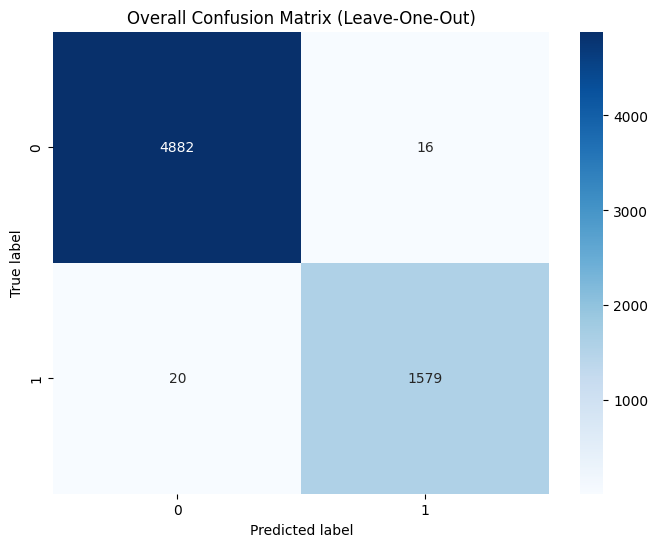

In [17]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()

# 2nd Dataset - Gamma Telescope Dataset

In [2]:
gamma_data = pd.read_csv("data/GammaTelescopeData/gamma_dataset.csv")

X = gamma_data.drop("class", axis=1)
y = gamma_data["class"]

count = y.value_counts()
print(count)

class
0    12332
1     6688
Name: count, dtype: int64


## Selecting K with K-fold

Mean Accuracy for k=1: 0.8166140904311252
Mean Accuracy for k=2: 0.8257623554153524
Mean Accuracy for k=3: 0.8242902208201892
Mean Accuracy for k=4: 0.8375920084121976
Mean Accuracy for k=5: 0.8328601472134596
Mean Accuracy for k=6: 0.8394847528916929
Mean Accuracy for k=7: 0.8369610935856994
Mean Accuracy for k=8: 0.841745531019979
Mean Accuracy for k=9: 0.8369085173501578
Mean Accuracy for k=10: 0.8435331230283912
Mean Accuracy for k=11: 0.8395373291272344
Mean Accuracy for k=12: 0.845478443743428
Mean Accuracy for k=13: 0.8422187171398529
Mean Accuracy for k=14: 0.8450578338590958
Mean Accuracy for k=15: 0.8419032597266035
Mean Accuracy for k=16: 0.8447423764458465
Mean Accuracy for k=17: 0.8410094637223974
Mean Accuracy for k=18: 0.8444794952681388
Mean Accuracy for k=19: 0.8426393270241851
Mean Accuracy for k=20: 0.8454258675078863
Mean Accuracy for k=21: 0.8421661409043113
Mean Accuracy for k=22: 0.8456361724500526
Mean Accuracy for k=23: 0.8423764458464774
Mean Accuracy for k=24

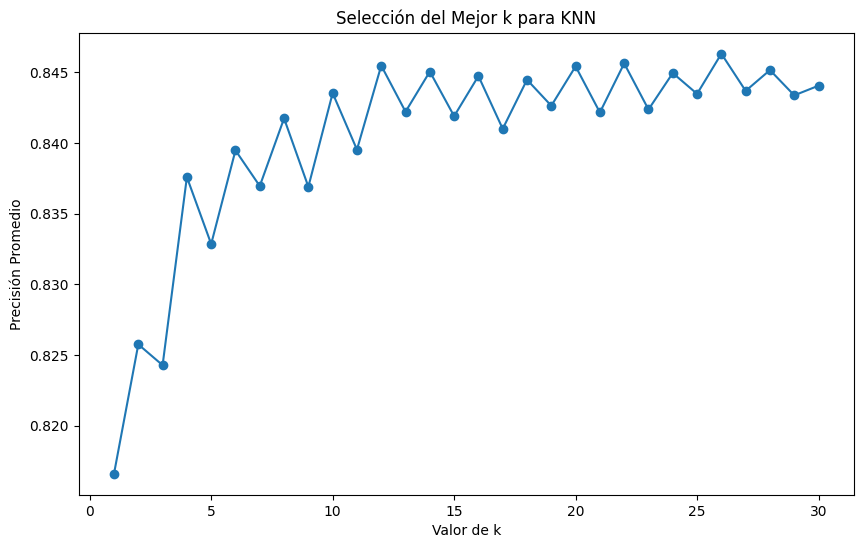

In [19]:
# Initialize the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=1)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

smote = SMOTE(random_state=42)
scaler = StandardScaler()

# Prueba diferentes valores de k
k_values = range(1, 31)  # Prueba de 1 a 30 vecinos
mean_accuracies = []

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    overall_confusion_matrix = np.zeros((2, 2))  # Ajusta el tamaño si tienes más de 2 clases

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplica SMOTE a los datos de entrenamiento
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Normaliza los datos de entrenamiento y de prueba
        X_train_resampled = scaler.fit_transform(X_train_resampled)
        X_test = scaler.transform(X_test)

        model_knn.fit(X_train_resampled, y_train_resampled)
        y_pred = model_knn.predict(X_test)

        # Calcula la precisión para cada fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Actualiza la matriz de confusión
        fold_confusion_matrix = confusion_matrix(y_test, y_pred)
        overall_confusion_matrix += fold_confusion_matrix

    # Calcula la precisión promedio para este valor de k
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)
    print(f"Mean Accuracy for k={k}: {mean_accuracy}")

# Encuentra el valor de k con la mejor precisión
best_k = k_values[np.argmax(mean_accuracies)]
print(f"\nEl mejor valor de k es: {best_k} con una precisión promedio de: {np.max(mean_accuracies)}")

# Gráfico de precisión promedio vs. valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-')
plt.xlabel('Valor de k')
plt.ylabel('Precisión Promedio')
plt.title('Selección del Mejor k para KNN')
plt.show()


## Hold-Out stratify

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)# Instantiate the classifier

In [21]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Instantiate the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=12)

# Train the classifier on the resampled training data
model_1NN.fit(X_train_resampled, y_train_resampled)

y_pred = model_1NN.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3700
           1       0.80      0.75      0.78      2006

    accuracy                           0.85      5706
   macro avg       0.84      0.83      0.83      5706
weighted avg       0.85      0.85      0.85      5706


Accuracy of the model: 0.8477041710480197




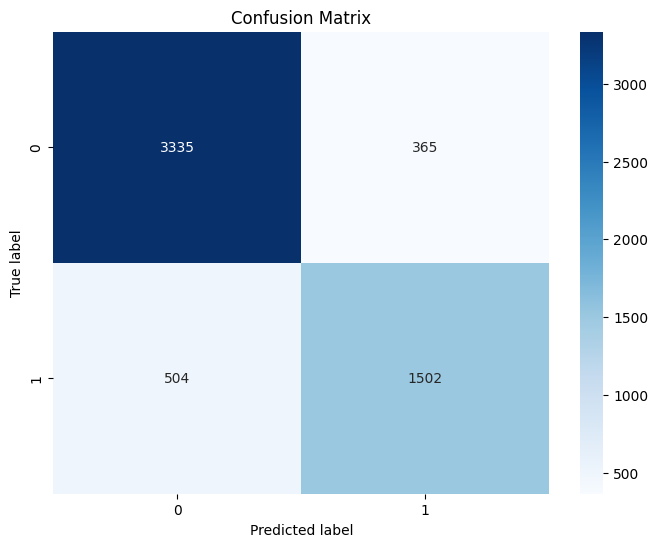

In [22]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [23]:
model_1NN = KNeighborsClassifier(n_neighbors=12)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [24]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    model_1NN.fit(X_train_resampled, y_train_resampled)
    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.845478443743428



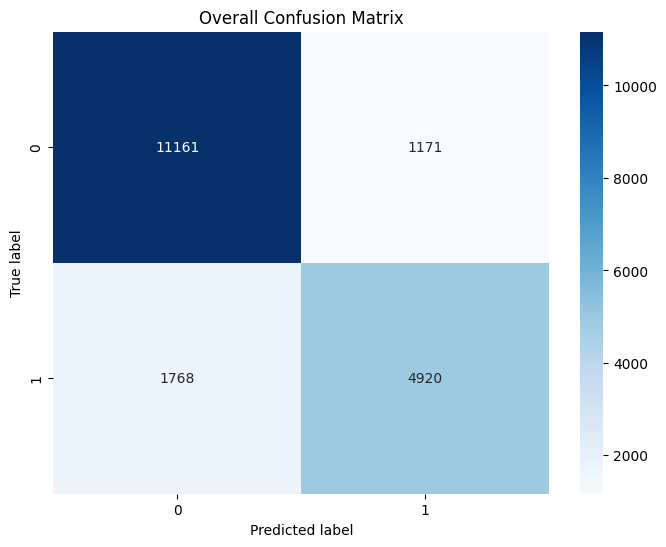

In [25]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [3]:
model_1NN = KNeighborsClassifier(n_neighbors=12)

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [4]:
gamma_data = pd.concat([X, y], axis=1)

sampled_data = gamma_data.groupby("class").sample(n=3500, random_state=42)


X_sampled = sampled_data.drop("class", axis=1)
y_sampled = sampled_data["class"]

print(y_sampled.value_counts())

class
0    3500
1    3500
Name: count, dtype: int64


In [5]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X_sampled):
    X_train, X_test = X_sampled.iloc[train_index], X_sampled.iloc[test_index]
    y_train, y_test = y_sampled.iloc[train_index], y_sampled.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    model_1NN.fit(X_train_resampled, y_train_resampled)
    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.81



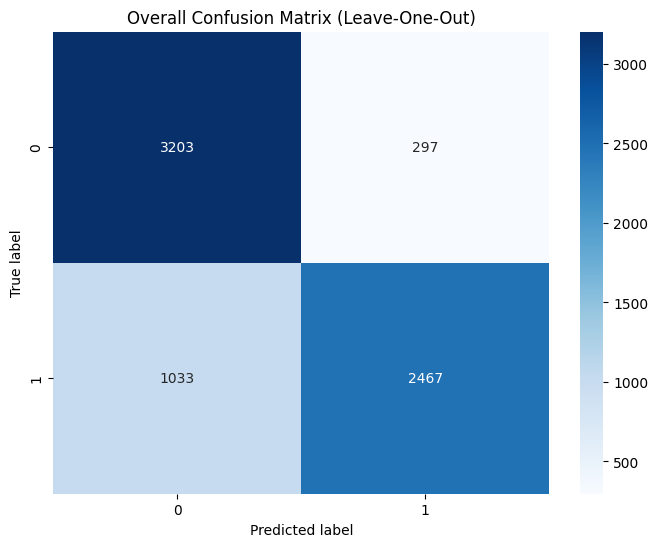

In [6]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()

# 3rd Dataset - Banknote Auth Dataset

In [10]:
banknoteData = pd.read_csv("data/BanknoteAuthentication/banknote_dataset.csv")

X = banknoteData.drop("class", axis=1)
y = banknoteData["class"]

count = y.value_counts()
print(count)

class
0    762
1    610
Name: count, dtype: int64


## Select K using K-fold


Mean Accuracy for k=1: 0.9978102189781021
Mean Accuracy for k=2: 0.9985401459854014
Mean Accuracy for k=3: 0.9985401459854014
Mean Accuracy for k=4: 0.9985401459854014
Mean Accuracy for k=5: 0.9985401459854014
Mean Accuracy for k=6: 0.9985401459854014
Mean Accuracy for k=7: 0.9985401459854014
Mean Accuracy for k=8: 0.9985401459854014
Mean Accuracy for k=9: 0.9985401459854014
Mean Accuracy for k=10: 0.9985401459854014
Mean Accuracy for k=11: 0.9985401459854014
Mean Accuracy for k=12: 0.9985401459854014
Mean Accuracy for k=13: 0.9985401459854014
Mean Accuracy for k=14: 0.9985401459854014
Mean Accuracy for k=15: 0.9963662329419231
Mean Accuracy for k=16: 0.9963662329419231
Mean Accuracy for k=17: 0.993446524912726
Mean Accuracy for k=18: 0.9941764519200254
Mean Accuracy for k=19: 0.9919866708981274
Mean Accuracy for k=20: 0.9927165979054268
Mean Accuracy for k=21: 0.9897968898762297
Mean Accuracy for k=22: 0.9912567438908283
Mean Accuracy for k=23: 0.9890722521950703
Mean Accuracy for k=2

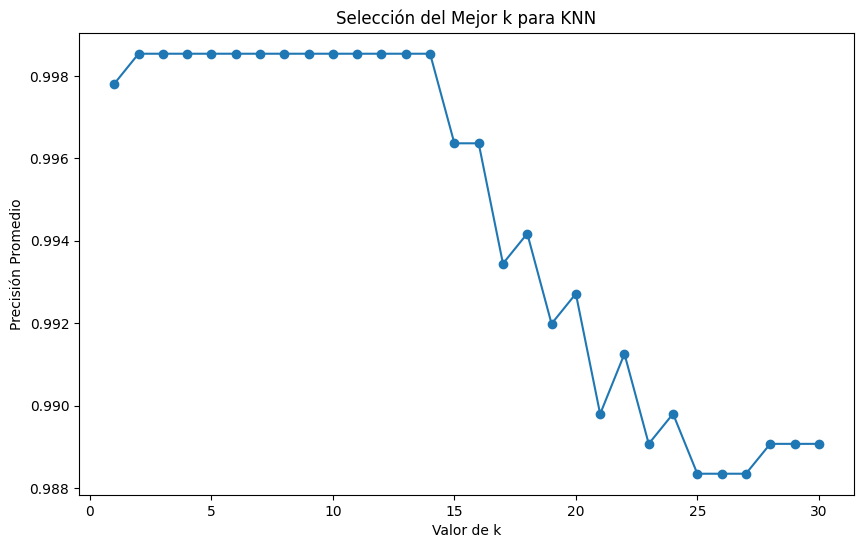

In [11]:
# Initialize the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=1)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

smote = SMOTE(random_state=42)
scaler = StandardScaler()

# Prueba diferentes valores de k
k_values = range(1, 31)  # Prueba de 1 a 30 vecinos
mean_accuracies = []

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    overall_confusion_matrix = np.zeros((2, 2))  # Ajusta el tamaño si tienes más de 2 clases

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplica SMOTE a los datos de entrenamiento
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Normaliza los datos de entrenamiento y de prueba
        X_train_resampled = scaler.fit_transform(X_train_resampled)
        X_test = scaler.transform(X_test)

        model_knn.fit(X_train_resampled, y_train_resampled)
        y_pred = model_knn.predict(X_test)

        # Calcula la precisión para cada fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Actualiza la matriz de confusión
        fold_confusion_matrix = confusion_matrix(y_test, y_pred)
        overall_confusion_matrix += fold_confusion_matrix

    # Calcula la precisión promedio para este valor de k
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)
    print(f"Mean Accuracy for k={k}: {mean_accuracy}")

# Encuentra el valor de k con la mejor precisión
best_k = k_values[np.argmax(mean_accuracies)]
print(f"\nEl mejor valor de k es: {best_k} con una precisión promedio de: {np.max(mean_accuracies)}")

# Gráfico de precisión promedio vs. valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-')
plt.xlabel('Valor de k')
plt.ylabel('Precisión Promedio')
plt.title('Selección del Mejor k para KNN')
plt.show()


## Hold-Out stratify

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [14]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Instantiate the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=2)

# Train the classifier on the resampled training data
model_1NN.fit(X_train_resampled, y_train_resampled)

y_pred = model_1NN.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412


Accuracy of the model: 1.0




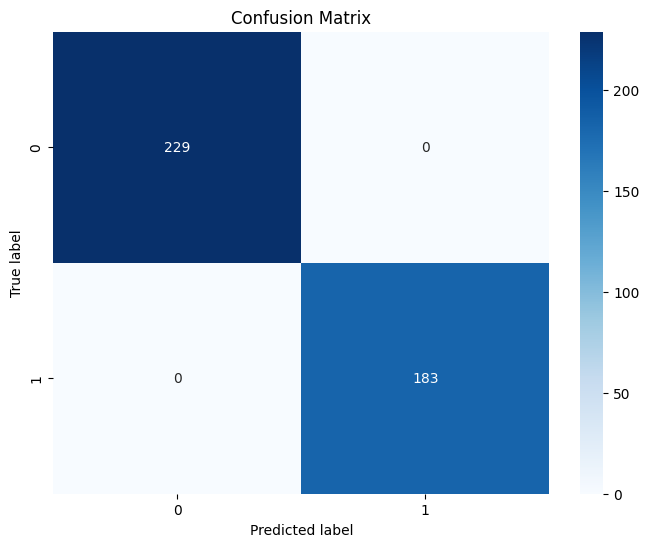

In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [17]:
# Instantiate the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=2)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [18]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    # Train the classifier on the resampled training data
    model_1NN.fit(X_train_resampled, y_train_resampled)

    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9985401459854014



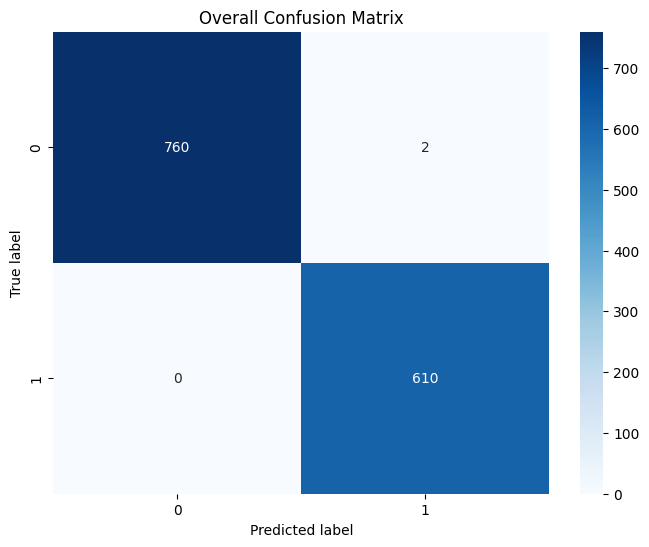

In [19]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [20]:
model_1NN = KNeighborsClassifier(n_neighbors=2)

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [21]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    # Train the classifier on the resampled training data
    model_1NN.fit(X_train_resampled, y_train_resampled)

    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9985422740524781



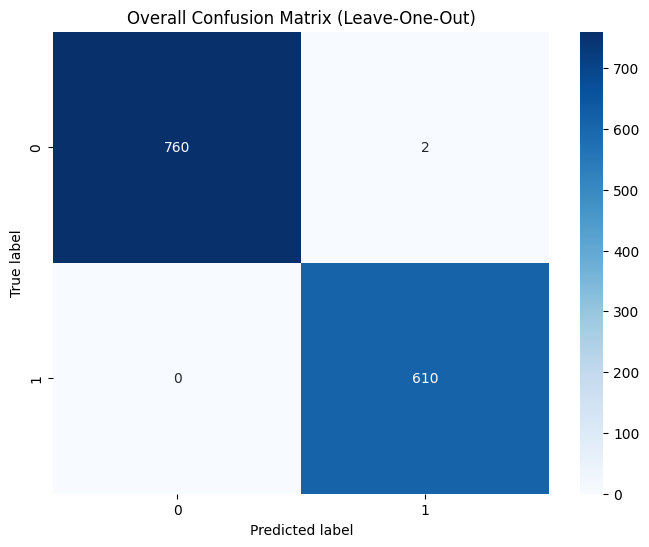

In [22]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()